In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SimplePerceptron:
    def __init__(self, isRegression = False, times = 1000, alpha = 0.5, epsilon = 0.0001, seed=0):
        """
        初期化
        
        Args:
            isRegression (bool) : 回帰の場合はTrue
            times        (int)  : 学習回数
            alpha        (float): 学習率
            epsilon      (float): 学習を終了する閾値
            seed         (int)  : 乱数の種
        """
        self.isRegression = isRegression
        self.W = None
        self.b = None
        self.times = times
        self.alpha = alpha
        self.epsilon = epsilon
        np.random.seed(seed)
    
    def Forward(self, X):
        """
        順伝播を計算
        self.isRegression == Trueの場合は0以上1以下の値を返す.
        self.isRegression == Falseの場合は0 or 1を返す.
        
        Args:
            X (numpy.ndarray) : 入力の行列(m×n)
                                mがサンプル数
                                nが特徴変数の数
        Returns:
            numpy.ndarray: 出力の行列(m×1)
        """

        # 活性化関数への入力を計算しZに代入
        Z = X.dot(self.W) + self.b
    
        a = self.ActivationFunction(Z)
        
        if not self.isRegression:
            # 0.5以上の項は1.0に、0.5未満の項は0.0にする
            return np.where(a >= 0.5, 1.0, 0.0)

        else:
            return a
    
    def Sigmoid(self, value):
        """
        シグモイド関数(ロジスティック関数)
        """
        return 1.0/(1.0 + np.exp(- value))
        
    def Sigmoid_d(self, value):
        """
        シグモイド関数(ロジスティック関数)の微分.
        """
        return self.Sigmoid(value) * (1.0 - self.Sigmoid(value))
    
    def ActivationFunction(self, value):
        """
        活性化関数.
        今回はシグモイド関数を採用.
        """
        return self.Sigmoid(value)

    def ActivationFunction_d(self, value):
        """
        活性化関数の微分.
        今回は活性化関数としてシグモイド関数を採用.
        """
        return self.Sigmoid_d(value)

    def J(self, Yh, Y):
        """
        コスト関数の計算
        
        Args:
            Yh (numpy.ndarray): Forwardの結果(m×1の行列).
            Y  (numpy.ndarray): 本当の値(m×1の行列).
            
        Returnes:
            numpy.ndarray: スカラー.
        """
        # コスト関数を計算しjに代入
        j = ((Yh - Y) * (Yh - Y)).sum() / 2.0
        
        return j

    def Delta(self, X, Y):
        """
        重みとバイアス項の更新量の計算
        
        Args:
            X (numpy.ndarray) : 入力の行列(m×n)
                                mがサンプル数
                                nが特徴変数の数
            Y (numpy.ndarray) : 本当の値(m×1の行列).
            
        Returns:
            numpy.ndarray : Xに繋がる重みの偏微分
            numpy.ndarray : バイアス項の偏微分
        """
        m, n = X.shape
        
        # dw(n×1の行列)を0で初期化
        dw = np.zeros((n,1))
        db = np.zeros((1,1))

        Z = X.dot(self.W) + self.b
        Yh = self.ActivationFunction(Z)
        G = self.ActivationFunction_d(Z)
        for i in range(m):
            
            # バイアス項の偏微分を計算
            db[0][0] = db[0][0] + (Yh[i]  - Y[i]) * G[i]
            
            for j in range(n):
                # 重みを計算しdw[j][0]に足し合わせる
                dw[j][0] = dw[j][0] + (Yh[i] - Y[i]) * G[i] * X[i][j]
                
        return dw, db
        
    def Fit(self, X, Y):

        # 重みとバイアス項の初期化
        self.W = np.random.rand(X.shape[1], 1)
        self.b = np.zeros((1,1))

        # コスト関数の値がどう変わったのかを保存するリストを初期化
        J_List = []

        # 重み更新ループ
        for t in range(self.times):
            Yh = self.ActivationFunction(X.dot(self.W) + self.b)

            # 誤差の計算
            j = self.J(Yh, Y)
            J_List.append(j)

            # 誤差がepsilon以下なら終了
            if j <= self.epsilon:
                break
                
            # 重みとバイアス項の更新
            dw, db = self.Delta(X, Y)
            self.W = self.W - self.alpha * dw
            self.b = self.b - self.alpha * db            

        return J_List
    

In [3]:
# 入力と出力のデータを作成
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_AND = np.array([[0],[0],[0],[1]])
Y_OR = np.array([[0],[1],[1],[1]])
Y_NAND = np.array([[1],[1],[1],[0]])
Y_XOR = np.array([[0],[1],[1],[0]])

In [4]:
SP_OR = SimplePerceptron()
l_OR = SP_OR.Fit(X, Y_OR)

SP_AND = SimplePerceptron()
l_AND = SP_AND.Fit(X, Y_AND)

SP_NAND = SimplePerceptron()
l_NAND = SP_NAND.Fit(X, Y_NAND)

SP_XOR = SimplePerceptron()
l_XOR = SP_XOR.Fit(X, Y_XOR)

Text(0.5, 1.0, 'XOR')

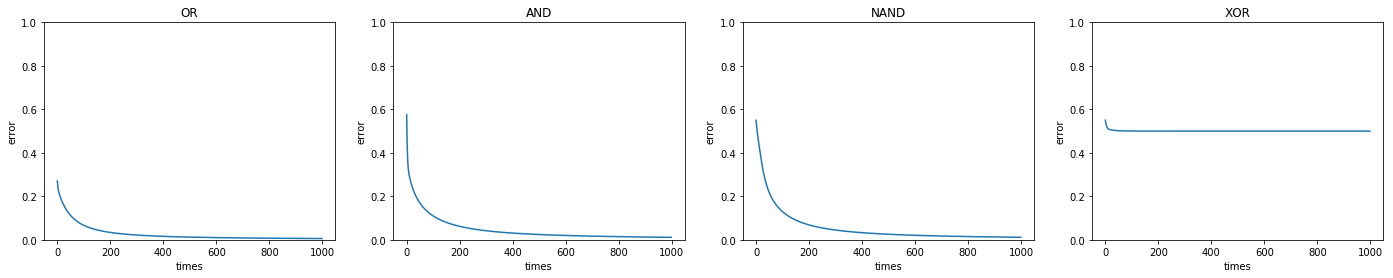

In [5]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
plt.plot(l_OR)
plt.xlabel("times")
plt.ylabel("error")
plt.ylim(0, 1)
plt.title("OR")

plt.subplot(1,4,2)
plt.plot(l_AND)
plt.xlabel("times")
plt.ylabel("error")
plt.ylim(0, 1)
plt.title("AND")

plt.subplot(1,4,3)
plt.plot(l_NAND)
plt.xlabel("times")
plt.ylabel("error")
plt.ylim(0, 1)
plt.title("NAND")

plt.subplot(1,4,4)
plt.plot(l_XOR)
plt.xlabel("times")
plt.ylabel("error")
plt.ylim(0, 1)
plt.title("XOR")

In [8]:
def XOR(X, SP_or, SP_and, SP_nand):
    a1 = SP_nand.Forward(X)
    a2 = SP_or.Forward(X)
    
    # a1とa2を横につなげて、A(3×2の行列)とする
    A = np.c_[a1, a2]
    print(A)
    Yh = SP_and.Forward(A)
    
    return Yh

In [9]:
XOR(X, SP_OR, SP_AND, SP_NAND)

[[1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]]


array([[0.],
       [1.],
       [1.],
       [0.]])